<a href="https://colab.research.google.com/github/Awangnugrawan/Machine-Learning/blob/main/Pertemuan_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DECISION TREE

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/decisiontree_ch6 (1).csv')
df1.head()

,ID,mesin,bangku,penggerak,label
0,1,bensin,4,depan,sedan
1,2,bensin,2,depan,sedan
2,3,bensin,8,belakang,minibus
3,4,diesel,6,depan,minibus
4,5,bensin,5,belakang,minibus


In [ ]:
df1.describe()

,ID,bangku
count,40.000000,40.000000
mean,20.500000,5.300000
std,11.690452,2.015326
min,1.000000,2.000000
25%,10.750000,4.000000
50%,20.500000,4.500000
75%,30.250000,8.000000
max,40.000000,8.000000


In [ ]:
df1

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus
5,6,1,8,1,minibus
6,7,1,8,1,minibus
7,8,0,4,0,sedan
8,9,1,7,1,minibus
9,10,0,4,0,sedan


In [ ]:
encoding = {"mesin":{"bensin":0,"diesel":1},"penggerak":{"depan":0,"belakang":1}}
df1.replace(encoding,inplace= True )

In [ ]:
df1

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus
5,6,1,8,1,minibus
6,7,1,8,1,minibus
7,8,0,4,0,sedan
8,9,1,7,1,minibus
9,10,0,4,0,sedan


In [ ]:
X=df1.drop(['ID','label'],axis=1)
y=df1['label']

In [ ]:
import sklearn.model_selection as ms
X_train, X_test, y_train,y_test = ms.train_test_split(X,y, test_size=0.2)

In [ ]:
X_train

,mesin,bangku,penggerak
3,1,6,0
8,1,7,1
27,0,4,0
1,0,2,0
33,1,6,0
11,1,6,1
16,0,8,1
0,0,4,0
4,0,5,1
37,0,4,0


entropy= keberaganman dalam data, dan max_dept= batas kedalaman leaf

In [ ]:
import sklearn.tree as tree 
model1= tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_prediksi=model1.predict(X_test)
y_prediksi


array(['sedan', 'sedan', 'minibus', 'minibus', 'minibus', 'minibus',
       'sedan', 'sedan'], dtype=object)

In [ ]:
y_test

9       sedan
23      sedan
24    minibus
32    minibus
6     minibus
34    minibus
17      sedan
20      sedan
Name: label, dtype: object

UNTUK CEK AKURASI , PREDIKSI DAN TEST

In [ ]:
import sklearn.metrics as met
print(met.accuracy_score(y_test,y_prediksi))

1.0


MODEL 2, 'GINI"

In [ ]:
import sklearn.tree as tree 
model2= tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_prediksi=model2.predict(X_test)
y_prediksi


array(['sedan', 'sedan', 'minibus', 'minibus', 'minibus', 'minibus',
       'sedan', 'sedan'], dtype=object)

In [ ]:
y_test

9       sedan
23      sedan
24    minibus
32    minibus
6     minibus
34    minibus
17      sedan
20      sedan
Name: label, dtype: object

UNTUK CEK AKURASI , PREDIKSI DAN TEST

In [ ]:
import sklearn.metrics as met
print(met.accuracy_score(y_test,y_prediksi))

1.0


In [ ]:
import pydotplus as pp
labels= ['mesin','bangku','penggerak']
dot_data= tree.export_graphviz(model1, out_file=None, feature_names=labels, filled = True, rounded= True  )
graph= pp.graph_from_dot_data (dot_data)
graph.write_png('decision.tree.png')

True

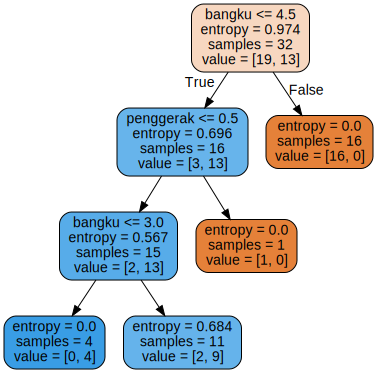

In [ ]:
import graphviz
graph2= graphviz.Source(dot_data, format = "png")
graph2